# Análise de Microdados Enade 2018

### Pacotes utilizados

In [20]:
import pandas as pd # pacote para manipulação da base
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (16,8) # define o tamanho padrão dos gráficos criados

### Importação dos dados

In [2]:
path = 'D:/UFPR/2º Semestre 2021/Estatística Econômica e Introdução à Econometria/1. Relatório Enade/2018/3.DADOS/microdados_enade_2018.txt'
microdados_enade = pd.read_table(path, sep=';', decimal=',')

In [3]:
microdados_enade.shape #dimensões do dataframe

(548127, 137)

### Analisando a Base

1) Quantos Alunos e IES(Instituições de Ensino Superior) são representados?

In [4]:
coluna_IES = microdados_enade.filter(['CO_IES']) #Atribuição da coluna IES em uma variável 

In [5]:
coluna_IES['CO_IES'].nunique() # Quantidade de IES através de contagem de valores únicos

1762

In [6]:
coluna_inscricao = microdados_enade.filter(['TP_INCRICAO'])

In [7]:
len(coluna_inscricao) #Quantidade de alunos representados na pesquisa do Enade

548127

2) Quantos cursos de economia existem no país?

In [8]:
colunas_grupo_curso = microdados_enade.filter(['CO_GRUPO', 'CO_CURSO']) #seleciono somente a coluna do grupo e código do curso.

In [9]:
colunas_grupo_curso[colunas_grupo_curso['CO_GRUPO'] == 13].nunique() #Quantidade de cursos de economia no Brasil (grupo 13)

CO_GRUPO      1
CO_CURSO    195
dtype: int64

3) Quantos são públicos e quantos são privados?

In [10]:
colunas_grupo_curso_categoria = microdados_enade.filter(['CO_GRUPO', 'CO_CURSO', 'CO_CATEGAD']).drop_duplicates()

In [11]:
colunas_grupo_curso_categoria.where(colunas_grupo_curso_categoria.CO_GRUPO == 13).groupby(['CO_CATEGAD']).count()
#Quantidade cursos de economia por categoria de ensino

,CO_GRUPO,CO_CURSO
CO_CATEGAD,,
93.0,9,9
115.0,17,17
116.0,3,3
118.0,9,9
120.0,1,1
121.0,5,5
10001.0,15,15
10002.0,53,53
10003.0,3,3


3) Quantos são diurnos, noturnos e integrais?

In [12]:
colunas_grupo_curso_turno = microdados_enade.filter(['CO_GRUPO', 'CO_CURSO','CO_IES', 'CO_TURNO_GRADUACAO']).drop_duplicates()

In [13]:
colunas_grupo_curso_turno.where(colunas_grupo_curso_turno.CO_GRUPO == 13).groupby(['CO_TURNO_GRADUACAO']).count()
#quantidade de cursos de economia por turno (informação errada)

,CO_GRUPO,CO_CURSO,CO_IES
CO_TURNO_GRADUACAO,,,
1.0,43,43,43
2.0,8,8,8
3.0,37,37,37
4.0,164,164,164


4) Quantos são presenciais e quantos são à distância?

In [14]:
colunas_grupo_curso_modalidade = microdados_enade.filter(['CO_GRUPO', 'CO_CURSO', 'CO_MODALIDADE']).drop_duplicates()

In [15]:
colunas_grupo_curso_modalidade.where(colunas_grupo_curso_modalidade.CO_GRUPO == 13).groupby(['CO_MODALIDADE']).count()
#Quantidade de cursos de economia por modalidade de ensino

,CO_GRUPO,CO_CURSO
CO_MODALIDADE,,
1.0,187,187
2.0,8,8


X) Nota média geral dos cursos de economia no Brasil

In [16]:
colunas_grupo_curso_nota = microdados_enade.filter(['CO_GRUPO', 'CO_CURSO', 'NT_GER', 'CO_CATEGAD','CO_IES'])

In [17]:
media_geral_economia = colunas_grupo_curso_nota.where(colunas_grupo_curso_nota.CO_GRUPO == 13).groupby(['CO_CURSO']).mean()

X) Mediana da nota geral dos cursos de economia no Brasil

In [18]:
colunas_grupo_curso_nota.where(colunas_grupo_curso_nota.CO_GRUPO == 13).groupby(['CO_GRUPO']).median() #mediana dos cursos de economia

,CO_CURSO,NT_GER,CO_CATEGAD,CO_IES
CO_GRUPO,,,,
13.0,13970.0,37.2,10002.0,572.0


X) Histograma da nota geral dos cursos de economia no Brasil

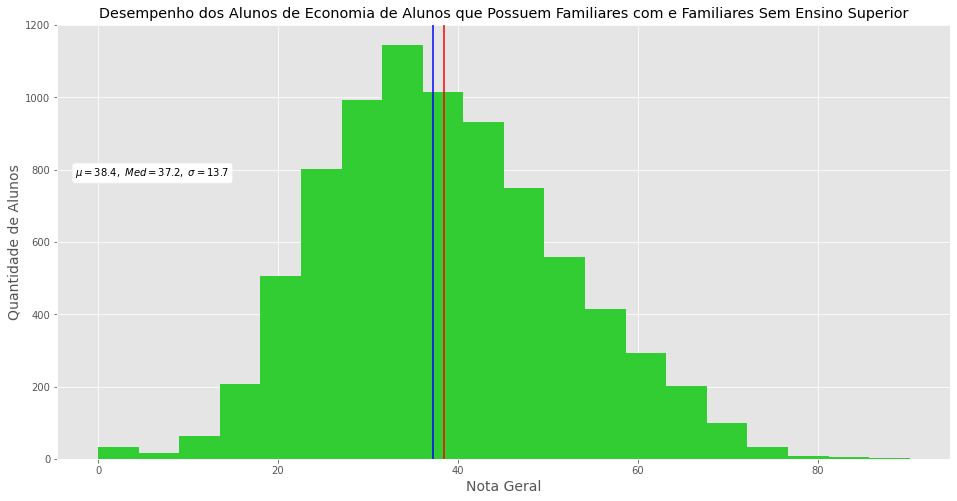

In [24]:
#Gráfico histograma do curso de economia (comparação com e sem ensino superior)
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.hist(colunas_grupo_curso_nota.where(colunas_grupo_curso_nota.CO_GRUPO == 13)['NT_GER'], 
    bins=20, 
    label='Possuem Ensino Superior', 
    color='limegreen'
    )
ax.vlines([38.397424], 0, 1, transform=ax.get_xaxis_transform(), colors=['red'], label='Média')
ax.vlines([37.2], 0, 1, transform=ax.get_xaxis_transform(), colors=['blue'], label='Mediana')
ax.set_title('Desempenho dos Alunos de Economia de Alunos que Possuem Familiares com e Familiares Sem Ensino Superior')
ax.set_xlabel('Nota Geral', size='14')
ax.set_ylabel('Quantidade de Alunos', size='14')
ax.text(0.02,
    0.65, 
    r'$\mu=38.4,\ Med=37.2,\ \sigma=13.7$', 
    transform=ax.transAxes, 
    fontsize=10, 
    bbox={'boxstyle':'round','facecolor':'white','alpha':1})
fig.savefig('Gráfico histograma do curso de economia.jpg')

<AxesSubplot:>

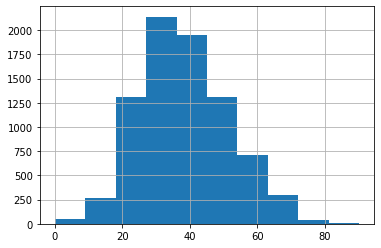

In [ ]:
#colunas_grupo_curso_nota['NT_GER'].hist(bins=20)
colunas_grupo_curso_nota.where(colunas_grupo_curso_nota.CO_GRUPO == 13)['NT_GER'].hist()

X) Nota média do curso de economia nas universidades federais

In [ ]:
colunas_grupo_curso_nota.where((colunas_grupo_curso_nota.CO_GRUPO == 13) & (colunas_grupo_curso_nota.CO_CATEGAD == 93))\
    .groupby(['CO_CATEGAD', 'CO_GRUPO']).mean() #média dos alunos de economia das universidades federais

,,CO_CURSO,NT_GER,CO_IES
CO_CATEGAD,CO_GRUPO,,,
93.0,13.0,431859.170732,41.073427,3218.157598


In [ ]:
colunas_grupo_curso_nota.where((colunas_grupo_curso_nota.CO_GRUPO == 13)\
     & (colunas_grupo_curso_nota.CO_CATEGAD == 10002))\
     .groupby(['CO_CATEGAD']).mean() #média dos alunos de economia da UFPR

NameError: name 'colunas_grupo_curso_nota' is not defined

X) Média e mediana da nota geral do curso de economia da UFPR

In [ ]:
colunas_grupo_curso_nota.where((colunas_grupo_curso_nota.CO_GRUPO == 13)\
     & (colunas_grupo_curso_nota.CO_CATEGAD == 10002)\
     & (colunas_grupo_curso_nota.CO_IES == 571))\
     .groupby(['CO_GRUPO']).mean() #média dos alunos de economia da UFPR

,CO_CURSO,NT_GER,CO_CATEGAD,CO_IES
CO_GRUPO,,,,
13.0,37169.0,38.806186,10002.0,571.0


In [ ]:
colunas_grupo_curso_nota.where((colunas_grupo_curso_nota.CO_GRUPO == 13)\
     & (colunas_grupo_curso_nota.CO_CATEGAD == 10002)\
     & (colunas_grupo_curso_nota.CO_IES == 571))\
     .groupby(['CO_GRUPO']).median() #média dos alunos de economia da UFPR

,CO_CURSO,NT_GER,CO_CATEGAD,CO_IES
CO_GRUPO,,,,
13.0,49468.0,38.8,10002.0,571.0
